# Jonathan Hu 
## Assignment 2

# Coding SIR Plot

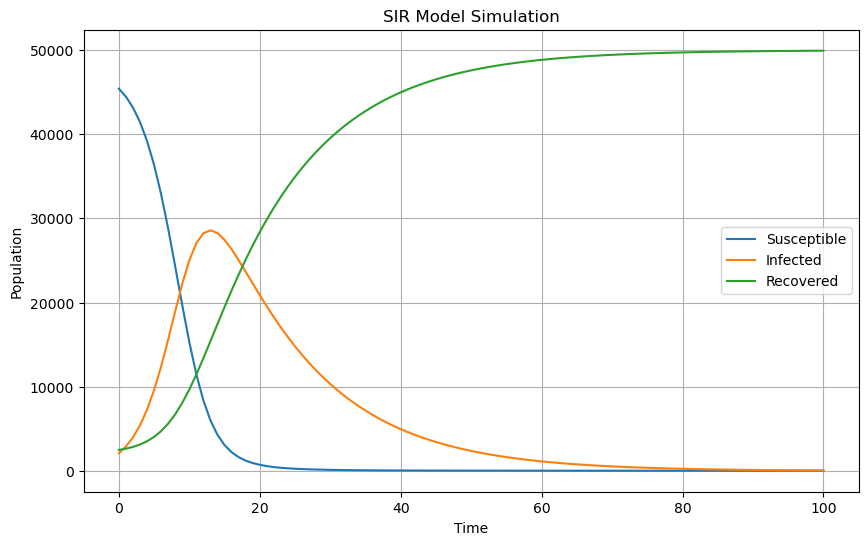

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants provided
t_initial = 0
t_final = 100
S = 45400
I = 2100
R = 2500
number_of_steps = 100
delta_t = (t_final - t_initial) / number_of_steps

# Initialize lists to store the time steps and S, I, R values
t_values = [t_initial]
S_values = [S]
I_values = [I]
R_values = [R]

# Simulation loop
for _ in range(number_of_steps):
    S_prime = -0.00001 * S * I
    I_prime = 0.00001 * S * I - I / 14
    R_prime = I / 14
    
    # Update S, I, R
    S += S_prime * delta_t
    I += I_prime * delta_t
    R += R_prime * delta_t
    
    # Update time
    t_values.append(t_values[-1] + delta_t)
    S_values.append(S)
    I_values.append(I)
    R_values.append(R)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_values, S_values, label='Susceptible')
plt.plot(t_values, I_values, label='Infected')
plt.plot(t_values, R_values, label='Recovered')
plt.title('SIR Model Simulation')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

# Time steps

From testing, it has been observed that increasing the number of steps enhances the smoothness of the graph. Notably, at around 100 steps, the graph smoothness reaches a level where further increases in steps do not noticeably improve it. This phenomenon relates to the length of time we simulate because smaller timesteps, resulting from a higher number of steps, increase the number of data points calculated along the time axis. This allows for more detailed and accurate tracking of changes in the state variables (S, I, R), leading to smoother and more reliable graphs. Conversely, larger timesteps (fewer steps) might skip over critical changes, reducing the graph's reliability and accuracy."

# --------------------------------

# How Bad is Your Epidemic 

### 1. and 2.


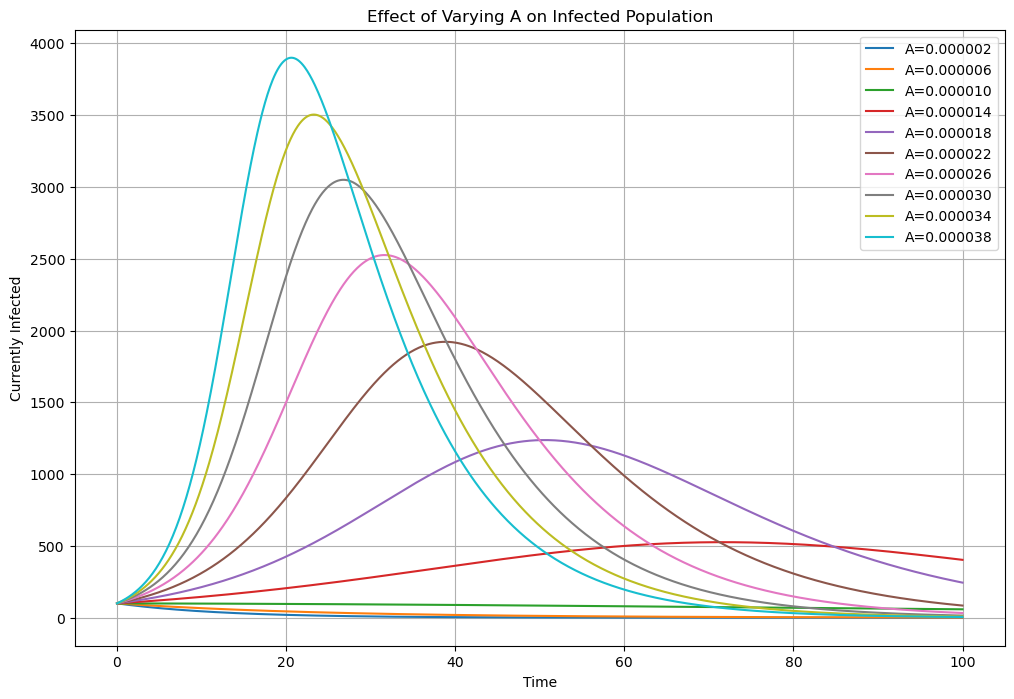

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
t_initial = 0
t_final = 100  
I_initial = 100  # Initial infected
S_initial = 9900  # Assume population of 10000
R_initial = 0
number_of_steps = 1000
delta_t = (t_final - t_initial) / number_of_steps

A_values = np.arange(0.000002, 0.000042, 0.000004)
L = 10 
B = 1 / L

# Simulation function
def simulate_SIR(A, L):
    S, I, R = S_initial, I_initial, R_initial
    t_values, I_values = [t_initial], [I_initial]
    for _ in range(number_of_steps):
        S_prime = -A * S * I
        I_prime = A * S * I - I / L
        R_prime = I / L
        S += S_prime * delta_t
        I += I_prime * delta_t
        R += R_prime * delta_t
        t_values.append(t_values[-1] + delta_t)
        I_values.append(I)
    return t_values, I_values

# Plotting
plt.figure(figsize=(12, 8))
for A in A_values:
    t, I = simulate_SIR(A, L)
    plt.plot(t, I, label=f'A={A:.6f}')

plt.title('Effect of Varying A on Infected Population')
plt.xlabel('Time')
plt.ylabel('Currently Infected')
plt.legend()
plt.grid(True)
plt.show()

# 3. 
Increasing A causes the epidemic to peak earlier and reach a higher number of infections at its peak. This is because a higher transmission rate means the disease spreads more rapidly among the susceptible population.

# 4.
Since the total number of individuals who get infected during the epidemic is represented by the R compartment at the end of the simulation, an increase in A would generally lead to a higher final value of R. This is due to a more rapid spread infects more people before interventions or natural limits slow the spread.\

# 5. LPlot

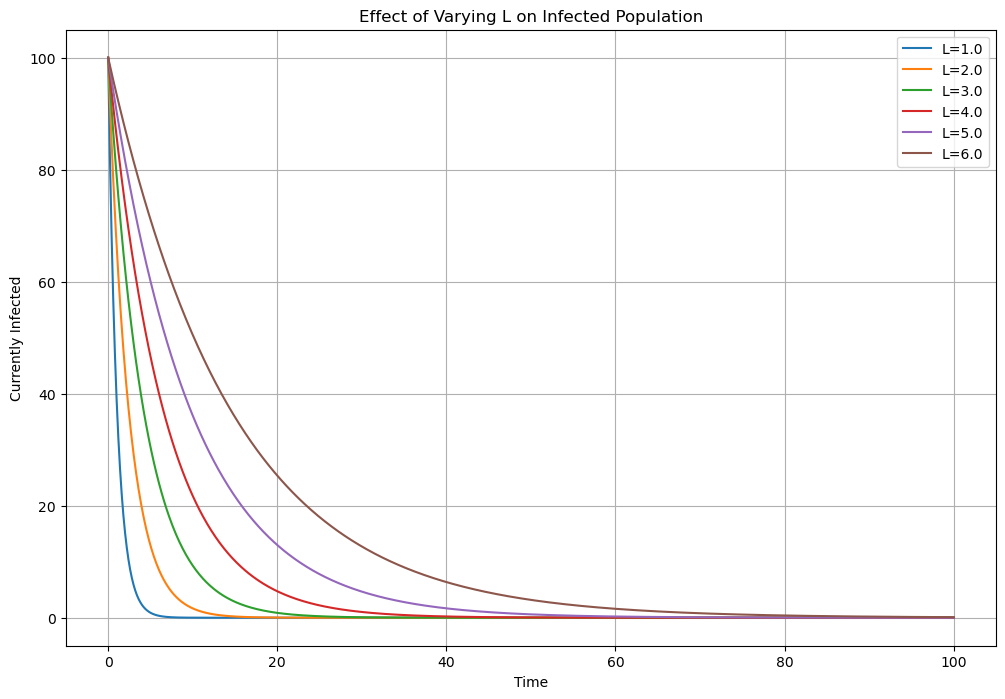

In [12]:
A = 0.00001

L_values = np.linspace(1, 6, 6)

plt.figure(figsize=(12, 8))
for L in L_values:
    B = 1 / L
    t, I = simulate_SIR(A, L)
    plt.plot(t, I, label=f'L={L:.1f}')

plt.title('Effect of Varying L on Infected Population')
plt.xlabel('Time')
plt.ylabel('Currently Infected')
plt.legend()
plt.grid(True)
plt.show()

# 6. 
The increase in L leads to a slower progression of the epidemic, with fewer individuals infected at the peak. The epidemic lasts longer but is less intense at any given point.

# 7. 
There is a significant difference between L=1 and L=6. At L=1, the disease progresses very rapidly, and the curve peaks early but declines quickly. At L=6, the curve is much flatter and prolonged. The major change appears to occur progressively as L increases. The concept at play here is herd immunity threshold, which is the point at which enough individuals have recovered to prevent the spread of the disease among susceptibles. The higher L allows more time for individuals to recover and create a slowing effect on the spread of the disease.

# 8.
The total number of infected by the end of the epidemic can be deduced from the final values of the recovered since R accounts for all individuals who were infected and then recovered.

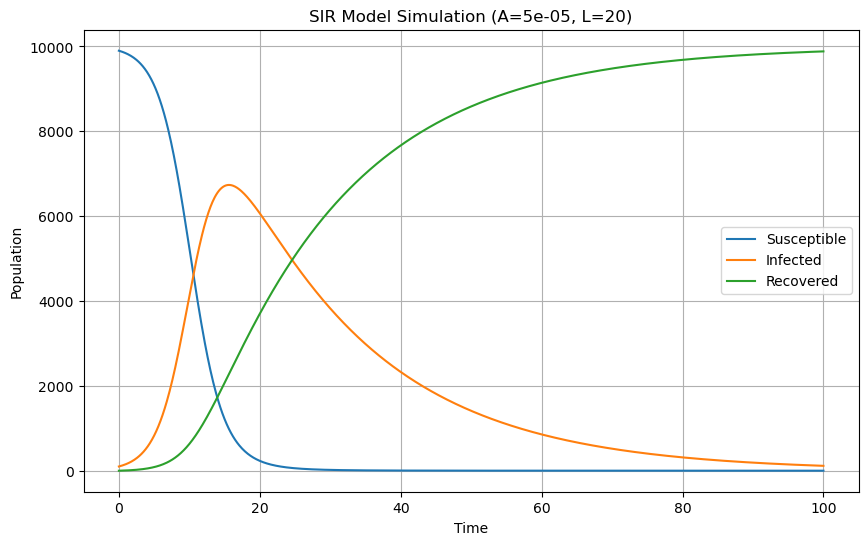

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
t_initial = 0
t_final = 100  
I_initial = 100 
S_initial = 9900 
R_initial = 0  
number_of_steps = 1000
delta_t = (t_final - t_initial) / number_of_steps

def simulate_SIR(A, L, S_initial, I_initial, R_initial, t_initial, t_final, number_of_steps):
    S, I, R = S_initial, I_initial, R_initial
    delta_t = (t_final - t_initial) / number_of_steps
    t_values = [t_initial]
    I_values = [I_initial]
    S_values = [S_initial]
    R_values = [R_initial]

    for _ in range(number_of_steps):
        S_prime = -A * S * I
        I_prime = A * S * I - I / L
        R_prime = I / L
        
        S += S_prime * delta_t
        I += I_prime * delta_t
        R += R_prime * delta_t

        t_values.append(t_values[-1] + delta_t)
        I_values.append(I)
        S_values.append(S)
        R_values.append(R)

    return t_values, S_values, I_values, R_values

def plot_SIR(A, L):
    t, S, I, R = simulate_SIR(A, L, S_initial, I_initial, R_initial, t_initial, t_final, number_of_steps)
    plt.figure(figsize=(10, 6))
    plt.plot(t, S, label='Susceptible')
    plt.plot(t, I, label='Infected')
    plt.plot(t, R, label='Recovered')
    plt.title(f'SIR Model Simulation (A={A}, L={L})')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()

# Usage
plot_SIR(A=0.00005, L=20)  # Modify A and L here to change the simulation parameters

# 10. A = 0.0002, L = 5

A high A value causes the infection to spread rapidly, and a low L means people recover quicker, leading to a high peak early in the epidemic.

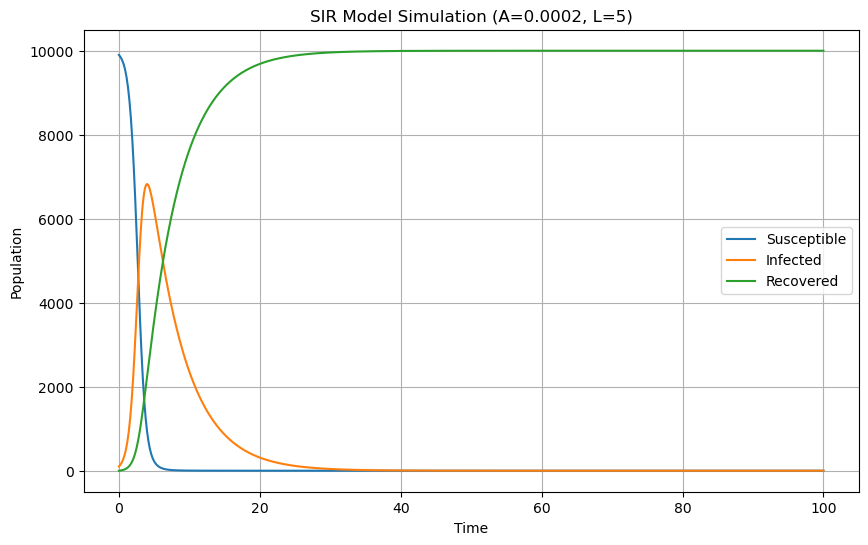

In [30]:
plot_SIR(A=0.0002, L=5)

# 11.
Higher A reduces the threshold for the epidemic to take off, as the infection spreads more readily.
Longer L reduces the threshold as infected individuals remain infectious for a longer period, facilitating the spread.
Shorter L increases the threshold, as individuals recover faster, reducing the period they can spread the infection.

# 12.
To modify the SIRPLOT to show the total new infected per day, calculate the daily change in the number of infected individuals at each timestep and plot these values to visualize the infection rate over time. For displaying the total number of infected individuals since day 0, accumulate these infected individuals values cumulatively and plot this cumulative total. 

# ---------------------------------

# The Duminto Dilemma

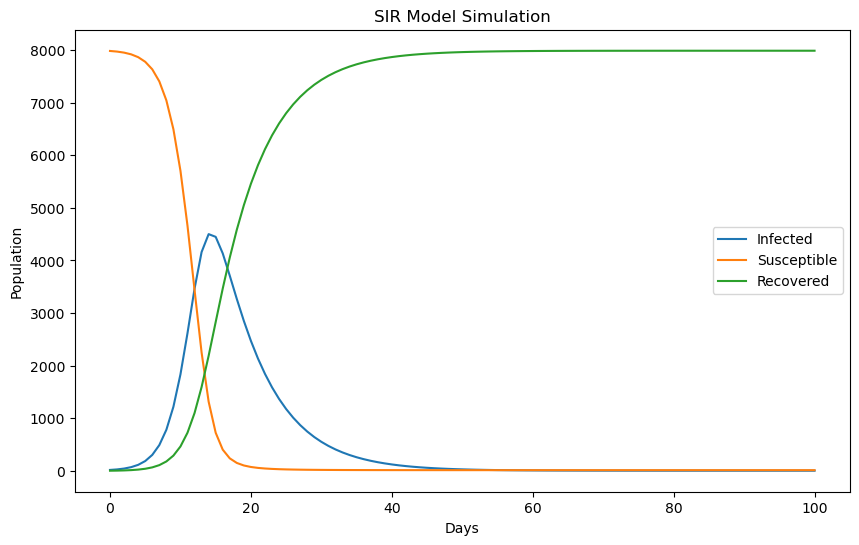

Day 30: I = 549.5424745349976, Day 31: I = 471.89919714661755


In [35]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_SIR(N, I0, R0, A, B, T):
    S = np.zeros(T + 1)
    I = np.zeros(T + 1)
    R = np.zeros(T + 1)
    S[0], I[0], R[0] = N - I0, I0, R0
    for t in range(T):
        S[t+1] = S[t] - A * S[t] * I[t]
        I[t+1] = I[t] + A * S[t] * I[t] - B * I[t]
        R[t+1] = R[t] + B * I[t]
    return S, I, R

# Parameters
N = 8000
I0 = 15
R0 = 0
B = 1/7
A = 0.0001 
T = 100

# Simulate
S, I, R = simulate_SIR(N, I0, R0, A, B, T)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(I, label='Infected')
plt.plot(S, label='Susceptible')
plt.plot(R, label='Recovered')
plt.legend()
plt.title("SIR Model Simulation")
plt.xlabel("Days")
plt.ylabel("Population")
plt.show()

# Analysis for day 30 and 31
print(f"Day 30: I = {I[30]}, Day 31: I = {I[31]}")

471.899 − 549.542 = −77.643

The peak of the epidemic occurred around Day 18 with about 4500 people being the highest number of concurrent infections. This implies that the spread has started to slow down or stabilize by then.

Will everyone get ill? A majority majority of individuals of the population will get infected with a 4500/8000. We can assume the rest of the population was spared from the infection. 

Loxville: Assuming the same rate of transmission and recovery as in Ryansville and starting with only one infected individual, the epidemic in Loxville can be expected to follow a similar pattern but might have slightly different dynamics due to the different initial infected population. The final size of the epidemic will be influenced by how quickly the disease is identified and controlled.



In [38]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_SIR(N, I0, B, A, days):
    S = np.zeros(days)
    I = np.zeros(days)
    R = np.zeros(days)
    S[0], I[0], R[0] = N - I0, I0, 0 

    for t in range(1, days):
        S[t] = S[t - 1] - (A * S[t - 1] * I[t - 1])
        I[t] = I[t - 1] + (A * S[t - 1] * I[t - 1]) - (B * I[t - 1])
        R[t] = R[t - 1] + (B * I[t - 1])

    return S, I, R

# Constants
N = 8000 
B = 1 / 7  
A = 0.0005  
days = 100

# Initial guess for I0
initial_infectious_guess = 5
peak_infected = 0
optimal_I0 = initial_infectious_guess

for I0 in range(1, 100): 
    _, I, _ = simulate_SIR(N, I0, B, A, days)
    if max(I) > peak_infected and np.argmax(I) <= 25:
        peak_infected = max(I)
        optimal_I0 = I0
        if peak_infected >= 2369:
            break  

print(f"The estimated initial number of people who started the epidemic in Big Rock is: {optimal_I0}")

The estimated initial number of people who started the epidemic in Big Rock is: 1


# Calculus in Context 1.2

## 24.
The units for k are persons per year per person because P′ is measured in persons per year, and P is measured in persons. k indicates the number of new individuals added annually per existing person in the population.

## 25.
a: P′=0.009P and A′=0.021A. 

b: Poland: P′=0.009 * 37500000 = 337500 persons per year

Afghanistan: A′=0.0216 * 15000000 =324000 persons per year 

c: 1/337500 * 525600 min/year = 1.56min population increase in Poland
1/324000 * 525600 min/year = 1.62min population increase in Afghanistan

## 28.
a: Newton's Law of Cooling can be expressed as: C′=−k(C−70)

b: k: -9 = -k(180 - 70) - 9 = -k * 110k = 9/110

c: C′=−k(C−70)C′= C′=−0.0818*(120−70) = C′=−0.0818*50C′ = −0.0818×50C' = −4.09 per minute

d: To calculate the time required for the coffee to cool from 180°F to 120°F involves using the initial cooling rate at 180°F, which is 9°F per minute. 180 - 120 = 60 / 9 = 6.7 minutes

However, this method might not fully capture the actual time needed as it simplifies the cooling process. A more refined approach would average the cooling rates at 180°F and 120°F, giving an average cooling rate of 6.55°F per minute. Using this average rate, the estimated time to cool down is about 9.2 minutes.

# Calculus in Context 2.2

## 1. 
a) population is around 95 million

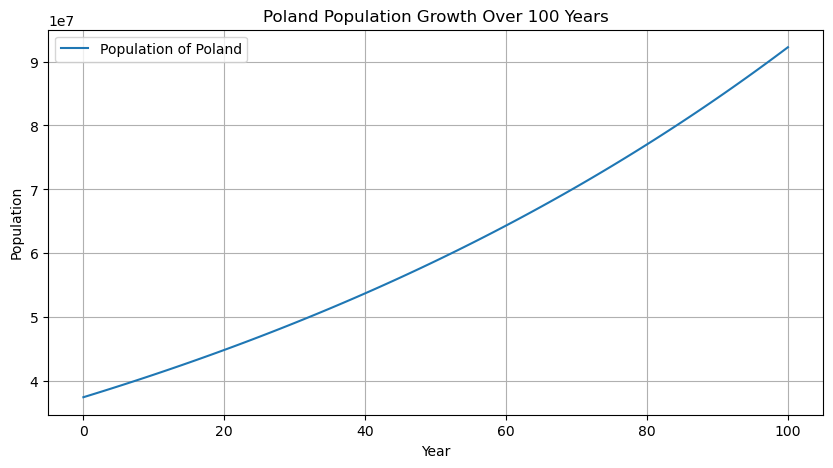

In [39]:
initial_population = 37500000  # Initial population of Poland
growth_rate = 0.009            # Annual growth rate
years = np.linspace(0, 100, 101) 

population = initial_population * np.exp(growth_rate * years)

plt.figure(figsize=(10, 5))
plt.plot(years, population, label='Population of Poland')
plt.title('Poland Population Growth Over 100 Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.legend()
plt.show()

# 2.
Average rabbit count: 815

In [43]:
def logistic_growth(y0, rate, carrying_capacity, t_final, steps):
    t = 0
    y = y0
    delta_t = t_final / steps
    while t < t_final:
        y_prime = rate * y * (1 - y / carrying_capacity)
        y += y_prime * delta_t
        t += delta_t
    return y

y0 = 100  # initial population
rate = 0.1  # growth rate
carrying_capacity = 1000  # carrying capacity of the environment
t_final = 37  # years
estimates = [logistic_growth(y0, rate, carrying_capacity, t_final, 10**k) for k in range(1, 6)]
estimates

[800.4989676734656,
 822.1124023511869,
 818.4003027065445,
 818.0292788161929,
 817.9921781215269]

# 3. 
a: As t grows larger, y increases until a point where it begins to stagnate.

b: y(0) = 1000: y(t) will stay stable at the carryinig capacity.

c: y(0) = 1500: y(t) will likely decrease over time, moving towards the carrying capacity of 1000

d: y(0) = 0: Starting with no population, y(t) will stay at 0 indefinitely, as there are no individuals to grow the population.

e: The carrying capacity of 1000 suggests that the environment has a limit to the resources such as food and water it can provide to support up to 1000 individuals of that species. Beyond this number, resources become insufficient to support additional individuals, leading to increased competition and potentially higher mortality rate. This value also reflects the balance point where the species' population size is stable without causing long-term negative effects on the environment. It balances the species' demands with what the environment can renew or sustain.

# 4. 
As carrying capacity increases, population increases until it reaches that carrying capacity.

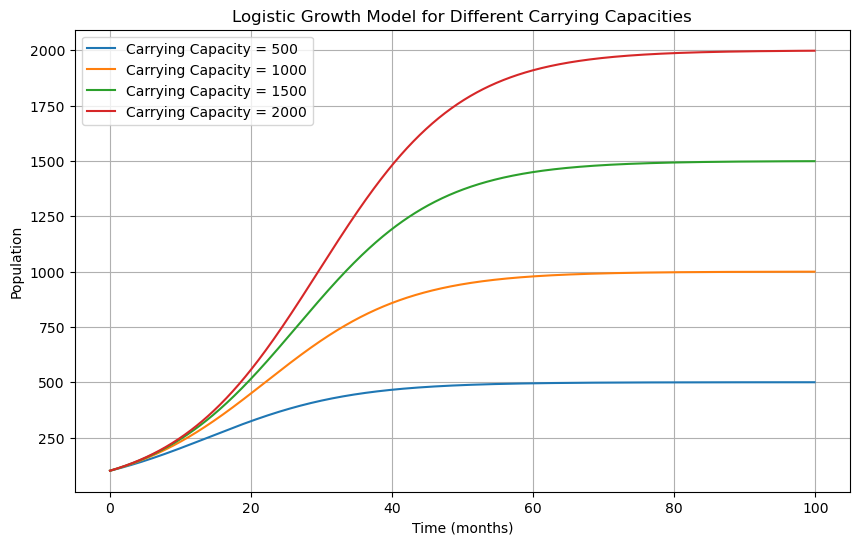

In [45]:
def logistic_growth(t, y0, growth_rate, K):
    y = y0
    dt = 0.1  # time step
    y_values = []
    for _ in np.arange(0, t, dt):
        y_values.append(y)
        y += growth_rate * y * (1 - y / K) * dt
    return y_values

t = 100  # total time
y0 = 100  # initial population
growth_rate = 0.1
capacities = [500, 1000, 1500, 2000]  # different carrying capacities

plt.figure(figsize=(10, 6))

for K in capacities:
    y_values = logistic_growth(t, y0, growth_rate, K)
    plt.plot(np.arange(0, t, 0.1), y_values, label=f'Carrying Capacity = {K}')

plt.title('Logistic Growth Model for Different Carrying Capacities')
plt.xlabel('Time (months)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

# 5.

Slower population growth takes longer to approach the carrying capacity where as quicker population growth reduces the time it takes to reach carrying capacity. 

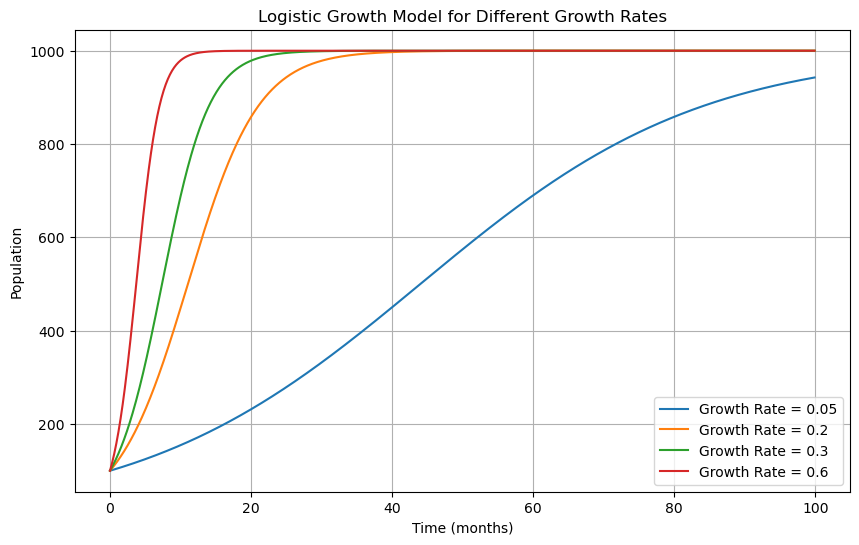

In [46]:
def logistic_growth(t, y0, growth_rate, K):
    y = y0
    dt = 0.1  
    y_values = []
    for _ in np.arange(0, t, dt):
        y_values.append(y)
        y += growth_rate * y * (1 - y / K) * dt
    return y_values

t = 100  # total time
y0 = 100  # initial population
growth_rates = [0.05, 0.2, 0.3, 0.6] 
K = 1000 

plt.figure(figsize=(10, 6))

for growth_rate in growth_rates:
    y_values = logistic_growth(t, y0, growth_rate, K)
    plt.plot(np.arange(0, t, 0.1), y_values, label=f'Growth Rate = {growth_rate}')

plt.title('Logistic Growth Model for Different Growth Rates')
plt.xlabel('Time (months)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

# 6.

In [48]:
def SIRVALUE(y0, growth_rate, K):
    t_initial = 0
    t_final = 100  
    t = t_initial
    y = y0
    number_of_steps = 1000 
    delta_t = (t_final - t_initial) / number_of_steps

    for k in range(number_of_steps):
        y_prime = growth_rate * y * (1 - y / K)
        delta_y = y_prime * delta_t
        y += delta_y
        t += delta_t
        if y >= 900:
            return t, y  # Stop as soon as y reaches at least 900

    return None, None


y0 = 100  # Initial population
growth_rate = 0.1  # growth rate
K = 1000  # carrying capacity

# Execution
time_reached, population_at_time = SIRVALUE(y0, growth_rate, K)
if time_reached is not None:
    print(f"The population reaches 900 at approximately t = {time_reached:.2f} with a population of {population_at_time:.2f}.")
else:
    print("The population does not reach 900 within the time span.")

The population reaches 900 at approximately t = 44.00 with a population of 900.50.


# 7. 
y(20) = 900
900 = 1000/(1+9e^-20r) = (100/8100)e^(-20r) = 1/81

-20r = ln(1/81) - 20r = ln(81)r = ln(81)/20

ln(81) = ln(3^4) = 4ln3 = 4.3944

r = 4.3944/20 = 0.2197

# Calculus in Context 2.3

In [60]:
import math

def f(x):
    return x**2

x_initial = 0
x_final = 1
number_of_steps = 200
delta_x = (x_final - x_initial) / number_of_steps
total_length = 0

for k in range(1, number_of_steps + 1):
    x_left = x_initial + (k - 1) * delta_x
    x_right = x_initial + k * delta_x
    y_left = f(x_left)
    y_right = f(x_right)
    segment_length = math.sqrt((x_right - x_left)**2 + (y_right - y_left)**2)
    total_length += segment_length

print(f"Number of steps: {number_of_steps}, Total length: {total_length}")

Number of steps: 200, Total length: 1.4789409941539637


# 1. x = 0,2

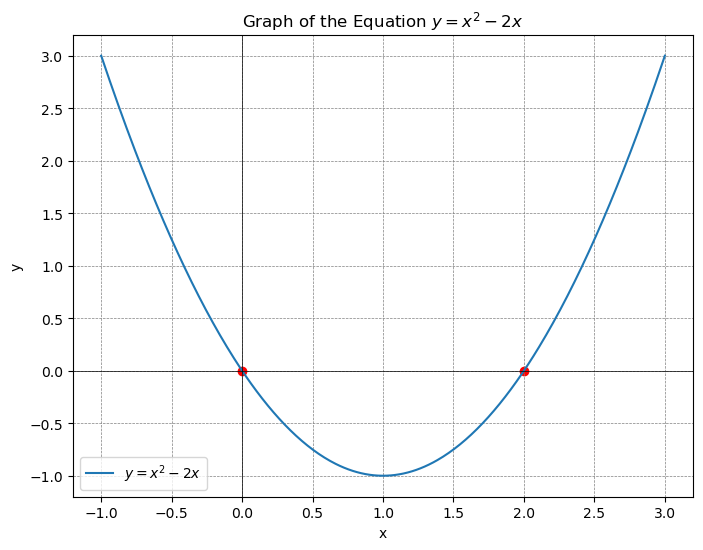

In [54]:
x = np.linspace(-1, 3, 400)
y = x**2 - 2*x

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='$y = x^2 - 2x$')
plt.scatter([0, 2], [0, 0], color='red')  # roots of the equation
plt.title('Graph of the Equation $y = x^2 - 2x$')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

# 3.
f(x) = x^2 is defined at the start. number_of_steps indicates the number of segments to be measured

# 4. 
The segment's end points are calculated in the loop by dividing the total range into equal intervals. The corresponding y-values are obtained by applying the function f.

# 5.
The length of each segment is accurately computed using the Pythagorean theorem. This confirms the length as the hypotenuse of a right triangle formed by the differences in x and y coordinates of the segment's endpoints.

# 6.
To modify the program for 20 segments, change the number_of_steps to 20. This will increase the granularity of the length estimation and likely provide a closer approximation to the true curve length.

# 7.

In [62]:
def f(x):
    return x**2

x_initial = 0
x_final = 1

# List of different step sizes to test
steps_list = [2, 20, 200, 2000, 20000, 200000, 2000000, 5000000]

for number_of_steps in steps_list:
    delta_x = (x_final - x_initial) / number_of_steps
    total_length = 0

    for k in range(1, number_of_steps + 1):
        x_left = x_initial + (k - 1) * delta_x
        x_right = x_initial + k * delta_x
        y_left = f(x_left)
        y_right = f(x_right)
        segment_length = math.sqrt((x_right - x_left)**2 + (y_right - y_left)**2)
        total_length += segment_length

    print(f"Number of steps: {number_of_steps}, Total length: {total_length}")

Number of steps: 2, Total length: 1.4604048132409448
Number of steps: 20, Total length: 1.4787565120290738
Number of steps: 200, Total length: 1.4789409941539637
Number of steps: 2000, Total length: 1.4789428389106984
Number of steps: 20000, Total length: 1.4789428573582584
Number of steps: 200000, Total length: 1.4789428575427506
Number of steps: 2000000, Total length: 1.4789428575446044
Number of steps: 5000000, Total length: 1.4789428575445511


# 8. 
8 decimal places: 1.47894285
12 decimal places: 1.478942857544

# 9. 
3.0413017

In [63]:
import scipy.integrate as spi

def integrand(x):
    return np.sqrt(1 + 4*x**2)
def arc_length_target(x):
    return spi.quad(integrand, 0, x)[0] - 10

from scipy.optimize import fsolve

x_solution = fsolve(arc_length_target, x0=1)
x_solution

array([3.0413017])

# 10.
1.54786565

In [64]:
def f(x):
    return x**3  # Updated function for y = x^3

x_initial = 0
x_final = 1
number_of_steps = 2000000  
delta_x = (x_final - x_initial) / number_of_steps
total_length = 0

for k in range(1, number_of_steps + 1):
    x_left = x_initial + (k - 1) * delta_x
    x_right = x_initial + k * delta_x
    y_left = f(x_left)
    y_right = f(x_right)
    segment_length = math.sqrt((x_right - x_left)**2 + (y_right - y_left)**2)
    total_length += segment_length

print(f"Number of steps: {number_of_steps}, Total length: {total_length:.8f}")

Number of steps: 2000000, Total length: 1.54786565
